/var/folders/3d/thk4g7jj4d52ms21t3_17w_h0000gn/T/ipykernel_51495/4281128439.py:35: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


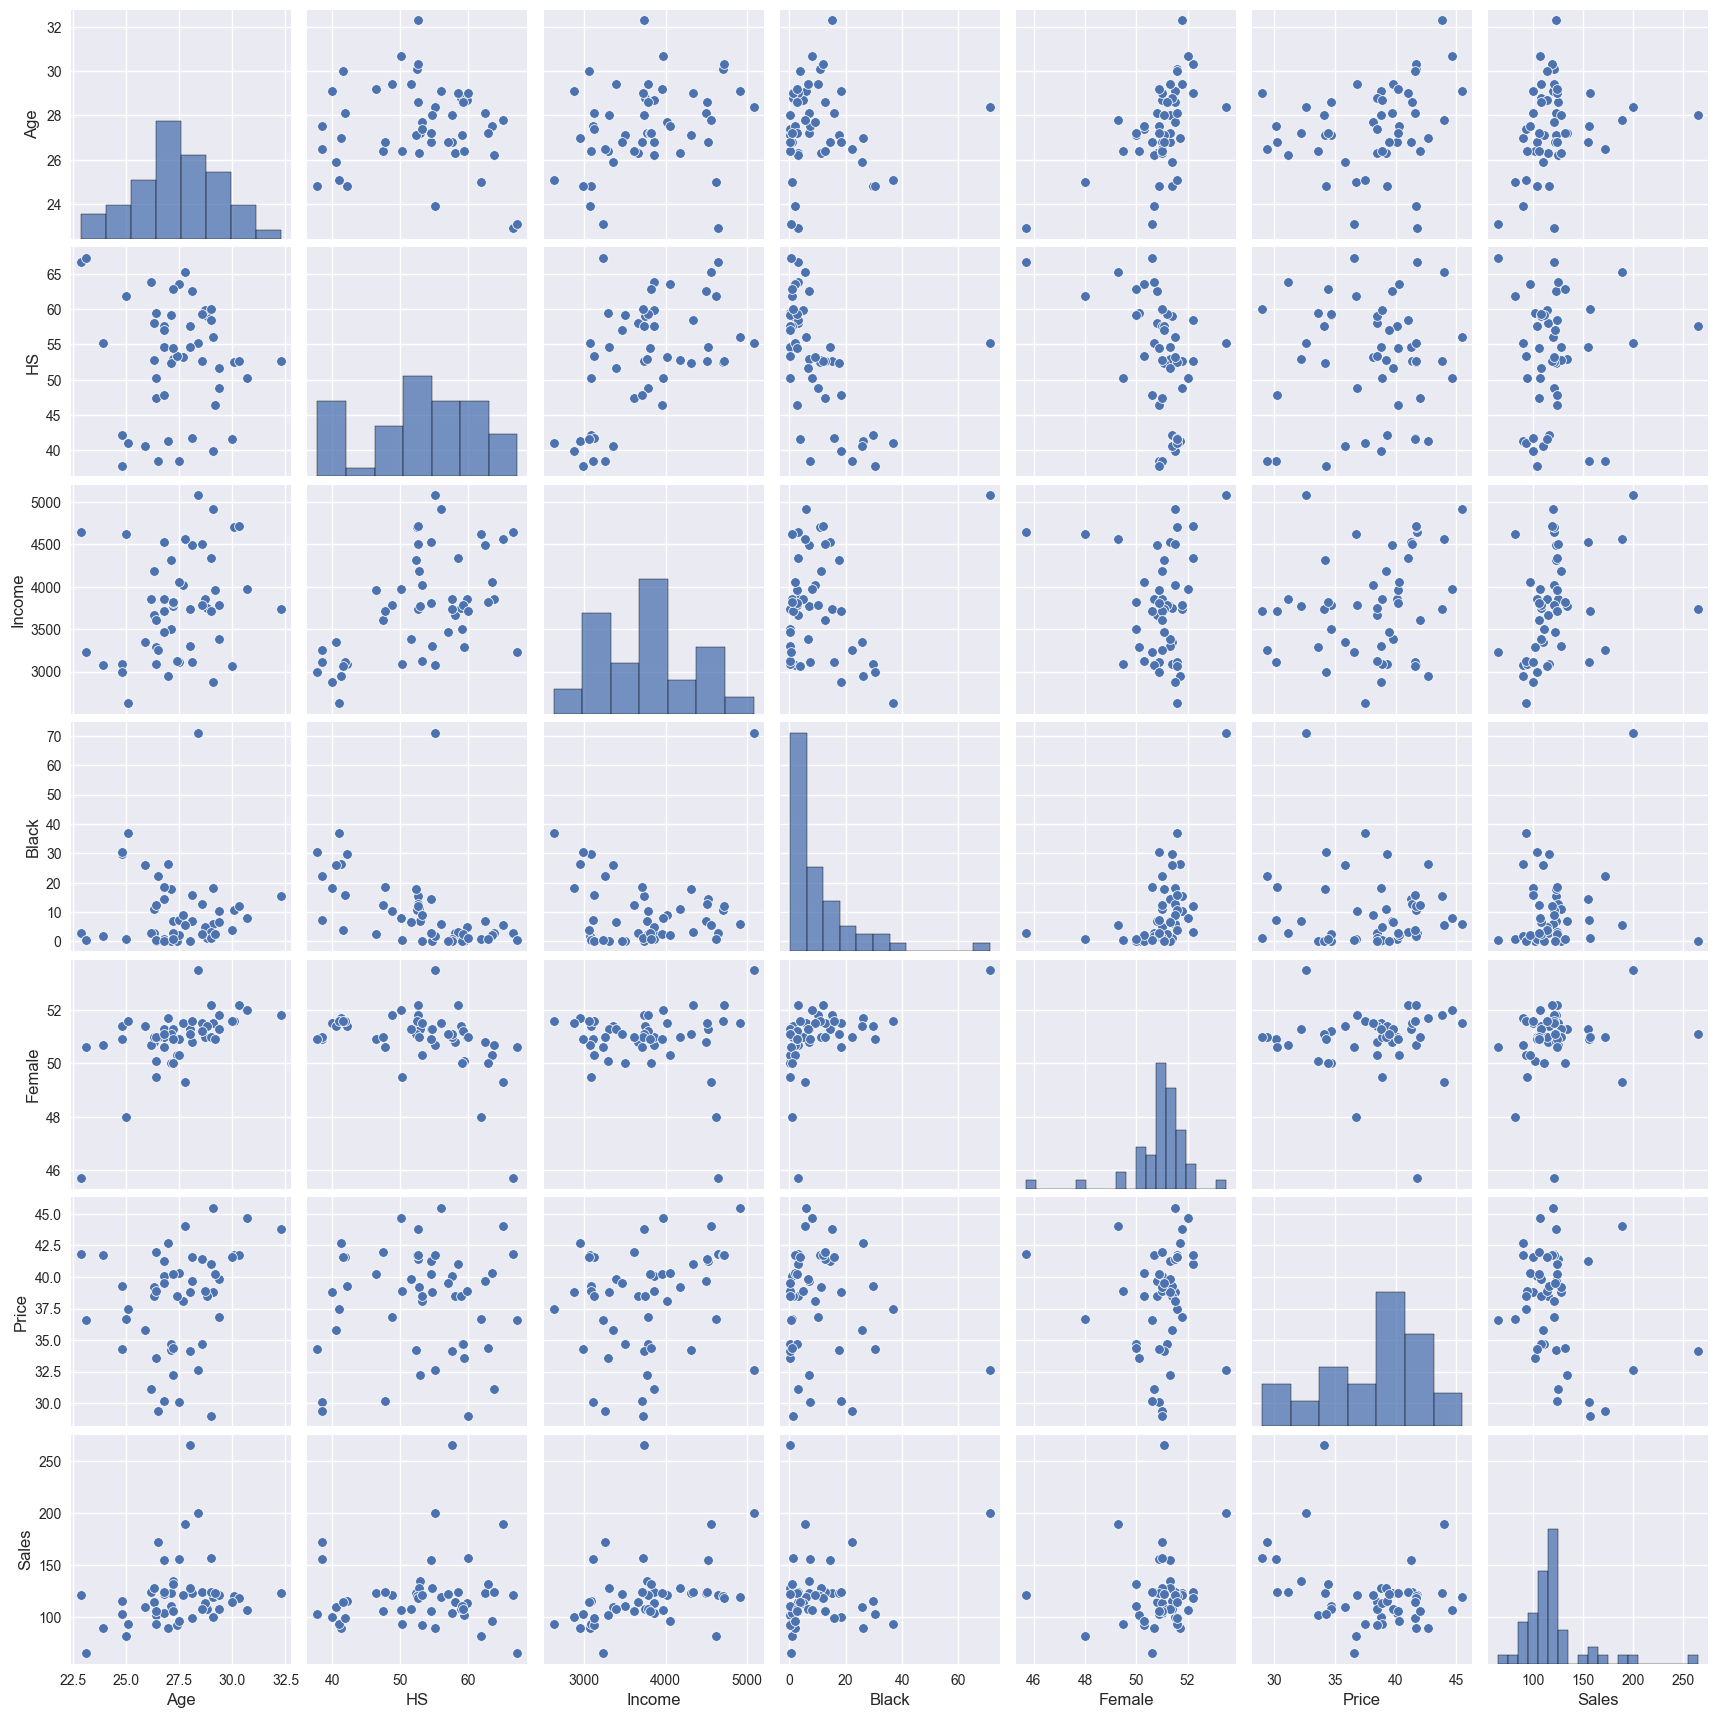

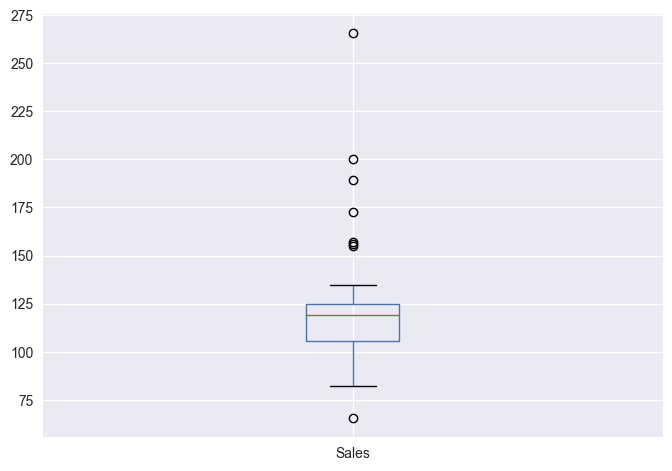

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.818
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           0.000657
Time:                        20:28:50   Log-Likelihood:                -239.51
No. Observations:                  51   AIC:                             487.0
Df Residuals:                      47   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2482     61.933      1.037      0.3

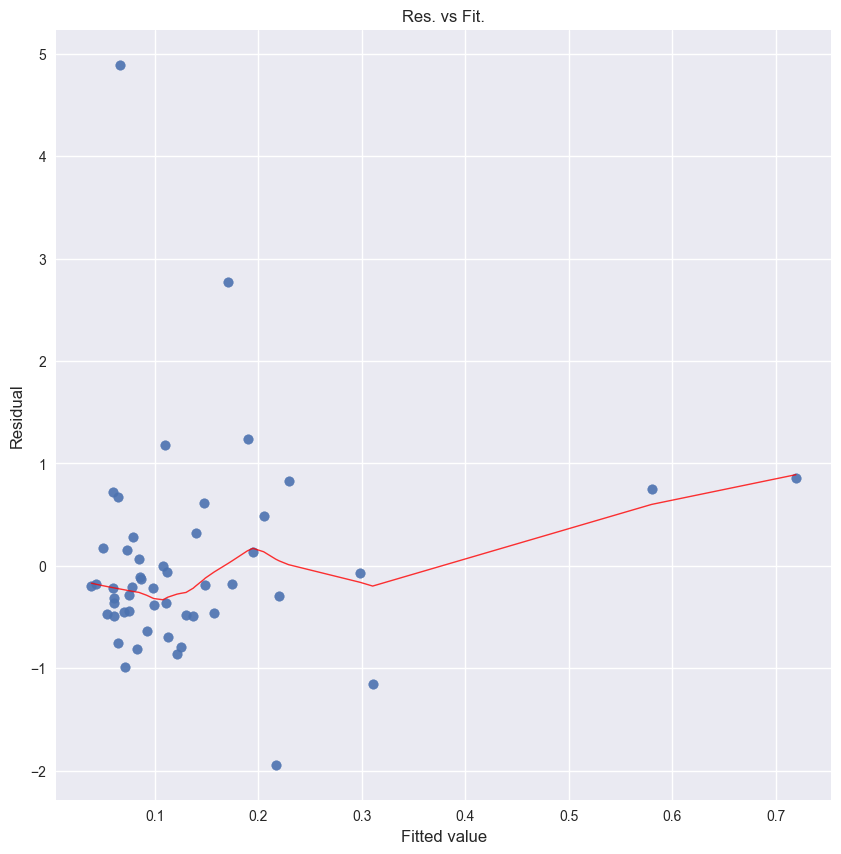

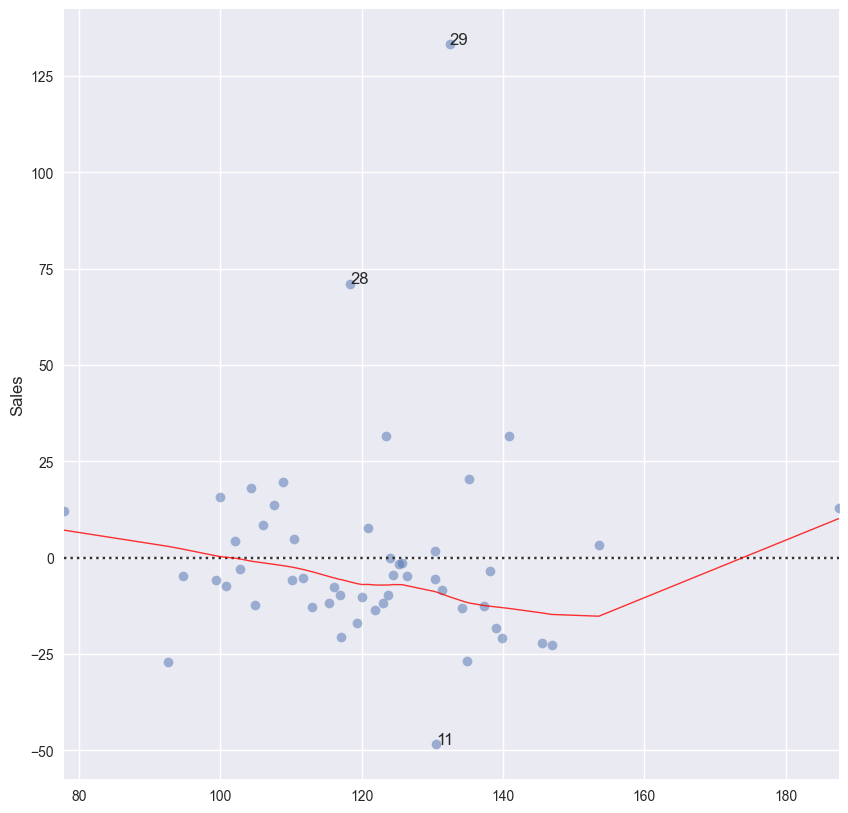

/Users/nedim/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


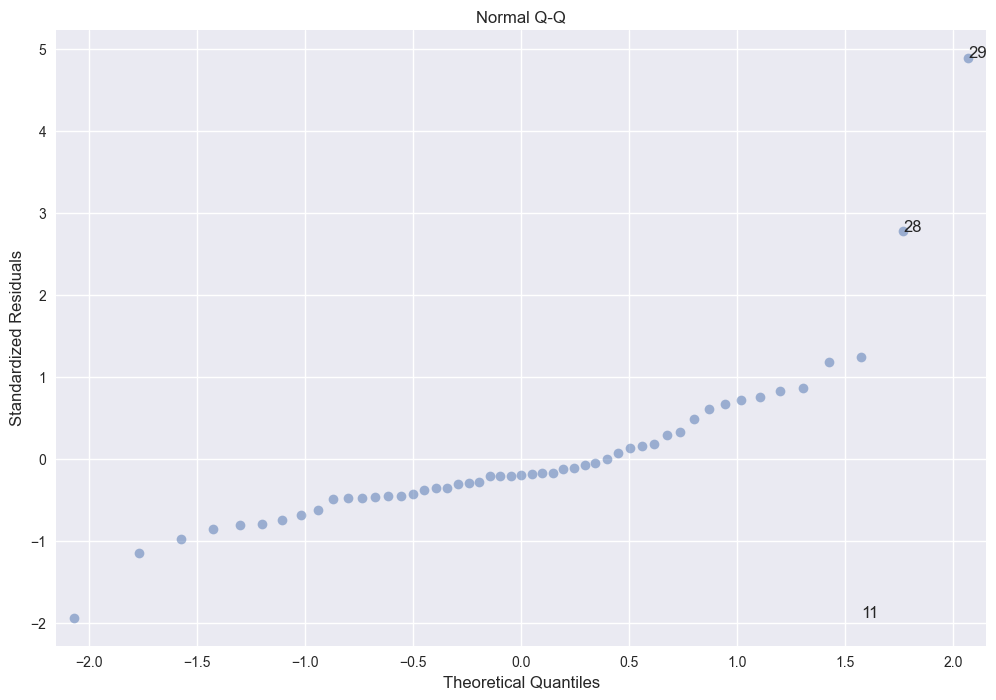

In [16]:
#Nedim Hodzic - Lab 05 - 574-01

# Problem Statement: A healthcare non-profit is interested in understanding the impact of statewide demographic information
#and cigarette prices on cigarette sales. They feel that if any of these factors are significantly related to
#cigarette sales, it will help them figure out which areas should be targeted with anti-smoking messaging.
#They provided you with the cigarette_sales.csv dataset. Information about this data is in the table
#below.

#Variable Description
#Age: Median age of persons living in a state
#HS: % of people >25 years of age in a state who had completed high school
#Income: Per capita personal income for a state in dollars
#Black: % of black race living in a state
#Female: % of females living in a state
#Price: Weighted average price in cents of a pack of cigarettes in a state
#Sales: Number of packs of cigarettes sold in a state per person

#1. Answer the following
#a) What is the outcome?
#Understanding the impact of statewide demographic information and cigarette prices on cigarette sales
#b) What are the predictors they want to understand the impact of?
#The predictors are demographic info and cigarette price
#c) What is the hypothesis?
# The null hypothesis is that there is no significant difference with the cigarette sales in relation to demographic and cigarette price data
# The alternative hypothesis is that there is significant difference with the cigarette sales in relation to demographic and cigarette price data


#2) Exploratory data analysis
#a) Look at a few rows of the data to understand it

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import numpy as np

#Connect to data
df = pd.read_csv('/Users/nedim/Downloads/cigarette_sales.csv')
#print 4 rows
df.head(4)
#b) Generate some summary statistics
df.describe()
#c) Look at the distributions and scatterplots of the data. A convenient function for doing this is pairplot() in Seaborn.
sns.pairplot(df)
plt.show()

#d) Do any of these variables look like they might violate regression assumptions? Which ones and which assumptions?
#Assumptions of regression are: linear relationship between x and y, constant variance, independence, and distribution of residuals is approx normal.

#It is evident that the following distributions are not normal, therefore they violate regression assumptions:
#Sales, Price, Black

#e) Are their outliers in the outcome?
#The boxplot below shows there are outliers, both upper and lower value outliers

df[['Sales']].boxplot()
plt.show()


#3) Multiple regression
#a) Conduct a multiple regression analysis
x = df[['Age','HS','Income','Black', 'Female', 'Price']]
y = df['Sales']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
#print(model.summary())
#A portion of the printed model summary is shown below 
#==============================================================================
#Dep. Variable:                  Sales   R-squared:                       0.321
#Model:                            OLS   Adj. R-squared:                  0.228
#Method:                 Least Squares   F-statistic:                     3.464
#Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00686
#Time:                        18:45:45   Log-Likelihood:                -238.86
#No. Observations:                  51   AIC:                             491.7
#Df Residuals:                      44   BIC:                             505.2
#Df Model:                           6                                         
#Covariance Type:            nonrobust                                         
#==============================================================================
#                coef    std err          t      P>|t|      [0.025      0.975]
#------------------------------------------------------------------------------
#const        103.3448    245.607      0.421      0.676    -391.644     598.334
#Age            4.5205      3.220      1.404      0.167      -1.969      11.009
#HS            -0.0616      0.815     -0.076      0.940      -1.703       1.580
#Income         0.0189      0.010      1.855      0.070      -0.002       0.040
#Black          0.3575      0.487      0.734      0.467      -0.624       1.339
#Female        -1.0529      5.561     -0.189      0.851     -12.260      10.155
#Price         -3.2549      1.031     -3.156      0.003      -5.334      -1.176
#==============================================================================

#b) Are any of the variables significant? Explain.
# Yes: sales and price
#As evident in the analysis above, there p value for price is <0.05 therefor we reject the null hypothesis
# we can conclude that there is a significant association between sales and price
#For all other columns of data, there is no statistically significant association

#c) Interpret the intercept and any significant coefficients (i.e. what is their meaning in relation to sales?)
#This tells us that each increase in age, income, black categories leads us to an increase in cigarette sales
# It also tells us that each increase in HS, Female, and Price data leads to a decrease in cigarette sales 
# The y-intercept tells us what cigarettes sales would be when all columns have values of 0
# See sales equation below:
#Cigarette_Sales = 103.3448 + 4.5205*(Age) + -0.0616*(HS) + 0.0189*(Income) + 0.3575*(Black) + -1.0529*(Female) + -3.2549*(Price)

#d) Does anything else in the output cause concern? 
#We have a low R^2 value as evident here: R-squared - 0.321
# R^2 tells us the proportion of variance in y that's being explained by x in a regression model
# This means that our model is only explaining 32% of the variance. We would like to see this value being much heigher. 

#Section 2: Detecting Assumption Violations
#1) Collinearity
#a) Compute the VIF for each covariate and explain what the results mean. Use this link.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns
vif

#Output shown below:
#VIF	variable
#1	2.300617	Age
#2	2.676465	HS
#3	2.325164	Income
#4	2.392152	Black
#5	2.406417	Female
#6	1.142181	Pric

#The results mean that we have moderate corellation for all variables (VIF variable values 1-5). Multi-collinearity is negligible. 

#b) Compute all the pairwise correlations between the variables. This link shows 3 ways to do this.
df.corr()

#c) Remove the 3 variables with the highest p-values. Refit the model. How have the p-values for the other variables changed? Did R2 change by much?
x_adjusted = df[['Age','Income','Price']]
x_adjusted = sm.add_constant(x_adjusted)
model = sm.OLS(y, x_adjusted).fit()
print(model.summary())

# P-values:==============================================================================
#                 coef    std err          t      P>|t|      [0.025      0.975]
#------------------------------------------------------------------------------
#const         64.2482     61.933      1.037      0.305     -60.345     188.841
#Age            4.1559      2.199      1.890      0.065      -0.267       8.579
#Income         0.0193      0.007      2.801      0.007       0.005       0.033
#Price         -3.3992      0.989     -3.436      0.001      -5.389      -1.409

#The p values decreased, as shown in the table, Now we can say that we can reject the null hypothesis for Income and Price
# therefor there is a corellation between the two and Sales

# R-squared: 0.303
# This means that our model is only explaining 30% of the variance. We would like to see this value being much heigher. 
# This is a slight decrease compared to 32% in the previous model

#Model Fit
#a) Find the goodness of fit measure in the output and explain what it means
# The goodness of fit can be described by R^2. It tells us the proportion of variance in y that's being explained by x in a regression model.
# In our model we know that we can explain 30% of the variance due to an R^2 value of 0.303.

#b) As noted in the video on MLE, AIC is another measure of fit. Which model has the lowest AIC value (lowest is best)?
#the model with the lowest AIC value is the second model. It's AIC was 487. 

#3) Outliers
#a) Do a leverage plot to see if the outliers are influential. Again, this resource is helpful.
plt.style.use('seaborn')
plt.rc('font', size=12)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=12)

model_f = 'Sales ~ Age + \
                 HS + \
                 Income + \
                 Black + \
                 Female + \
                 Price'

model = smf.ols(formula=model_f, data=df)

model_fit = model.fit()

# fitted values
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# norm. residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance (from statsmodels internals)
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(10)
plot_lm_1.set_figwidth(10)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_leverage, y=model_norm_residuals,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Res. vs Fit.')
plot_lm_1.axes[0].set_xlabel('Fitted value')
plot_lm_1.axes[0].set_ylabel('Residual')


abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
     plot_lm_1.axes[0].annotate(i,
                                xy=(model_fitted_y[i],
                                    model_residuals[i]));

plt.show()

#4) Linearity & constant variance
#a) Generate a predicted vs standardized residual plot

plot_lm_2 = plt.figure(1)
plot_lm_2.set_figheight(10)
plot_lm_2.set_figwidth(10)

plot_lm_2.axes[0] = sns.residplot(x=model_fitted_y, y='Sales', data=df,
                                  lowess=True,
                                   scatter_kws={'alpha': 0.5},
                                   line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
     plot_lm_2.axes[0].annotate(i,
                                xy=(model_fitted_y[i],
                                    model_residuals[i]));

plt.show()

#5) Normality
#a) Do a Q-Q Plot to see if the residuals are normally distributed

QQ_Plot = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ_Plot.qqplot(alpha=0.5, color='green', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ_Plot.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

plt.show()